<a href="https://colab.research.google.com/github/phk16/jupyterNotebooks/blob/main/diabetes_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px" id="EDA">1. Import dataset/library<a href='#Top' style="text-decoration: none;">^</a></span>

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from numpy import isnan
import warnings
from scipy.stats import skew

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
%matplotlib inline
warnings.filterwarnings('ignore')


print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.5.3
numpy version: 1.23.5
seaborn version: 0.12.2


 <div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#023e8a;padding:20px;border-radius:10px;border:3px solid #000066;color:white">
    
   <i><b>Importing file</b></i><br/>
   
</div>

In [ ]:
%%time
pd_df=pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv', na_values='nan')

CPU times: user 529 ms, sys: 43.2 ms, total: 572 ms
Wall time: 588 ms


# <span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px" id="EDA">2. Data Visualization and Exploration<a href='#Top' style="text-decoration: none;">^</a></span>

 <div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#023e8a;padding:20px;border-radius:10px;border:3px solid #000066;color:white">
    
   <i><b>Setting style for seaborn plots</b></i><br/>
   
</div>

In [ ]:

sns.set_style("white")
sns.set(rc={"axes.facecolor":"#05f28f", "figure.facecolor":"#c5f0de",
            "axes.grid":True, "grid.color":"black", "axes.edgecolor":"black",
            "grid.linestyle": u"-", "axes.labelcolor": "black", "font.family": [u"DejaVu Sans"],
            "text.color": "black", "xtick.color": "black", "ytick.color": "black",
            "legend.facecolor":"#65cee8", "legend.frameon": True, "legend.edgecolor":"#27a1bf"})
sns.set_context("poster",font_scale = 0.7)

palette = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7", "#f27a02","#97f7f6","#150647"]
palette_cmap = ["#272716","#6c2411","#cc3f18","#db6400","#ae0d13"]

 <div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#023e8a;padding:20px;border-radius:10px;border:3px solid #000066;color:white">
    
   <i><b>Setting table attributes</b></i><br/>
   
</div>

In [ ]:
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': 'background-color: #f0f099; color: black'
#     'props': [('background-color', '#ffffb3'; 'color')].
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: black; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #c5f0de; color: black;'
}

table_styles = [cell_hover, index_names, headers]
set_properties = {"background-color": "#05f28f","color":"black","border": "1.3px solid black"}

styles = pd_df.head(10).transpose().style.set_table_styles(table_styles).set_properties(**set_properties).highlight_null(color="#c600de").set_caption("10 sample records from the dataset.")
styles

,0,1,2,3,4,5,6,7,8,9
Diabetes_012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
HighBP,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
HighChol,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
CholCheck,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
BMI,40.000000,25.000000,28.000000,27.000000,24.000000,25.000000,30.000000,25.000000,30.000000,24.000000
Smoker,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
Stroke,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HeartDiseaseorAttack,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
PhysActivity,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
Fruits,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000


In [ ]:
print("\033[1m Some basic information about the dataset.\033[0m\n")

pd_df.info()

 Some basic information about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152085 entries, 0 to 152084
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          152085 non-null  float64
 1   HighBP                152085 non-null  float64
 2   HighChol              152085 non-null  float64
 3   CholCheck             152085 non-null  float64
 4   BMI                   152085 non-null  float64
 5   Smoker                152084 non-null  float64
 6   Stroke                152084 non-null  float64
 7   HeartDiseaseorAttack  152084 non-null  float64
 8   PhysActivity          152084 non-null  float64
 9   Fruits                152084 non-null  float64
 10  Veggies               152084 non-null  float64
 11  HvyAlcoholConsump     152084 non-null  float64
 12  AnyHealthcare         152084 non-null  float64
 13  NoDocbcCost           152084 non-null  float64
 14  GenHlth 

In [ ]:
missing_values = pd_df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(pd_df))*100
pd.DataFrame(pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])).style.set_table_styles(table_styles).set_properties(**set_properties)

,Missing values,% Missing
HvyAlcoholConsump,1,0.000658
AnyHealthcare,1,0.000658
Education,1,0.000658
Age,1,0.000658
Sex,1,0.000658
DiffWalk,1,0.000658
PhysHlth,1,0.000658
MentHlth,1,0.000658
GenHlth,1,0.000658
NoDocbcCost,1,0.000658


<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#023e8a;padding:20px;border-radius:10px;border:3px solid #000066;color:white">
    👀 &nbsp;<b>Inference</b><br />

   - <i>Let's understand what each columns are before doing EDA</i>
   - <i>we have been given diabetes data set with diabetes type 0, type 1 and type 2</i>
   - <i>the features were health attributes</i><br />
</div>

In [ ]:
pd_df['Diabetes_012'].unique()

array([0., 2., 1.])

In [ ]:
pd_df['Diabetes_012'].value_counts()

0.0    128415
2.0     20844
1.0      2826
Name: Diabetes_012, dtype: int64

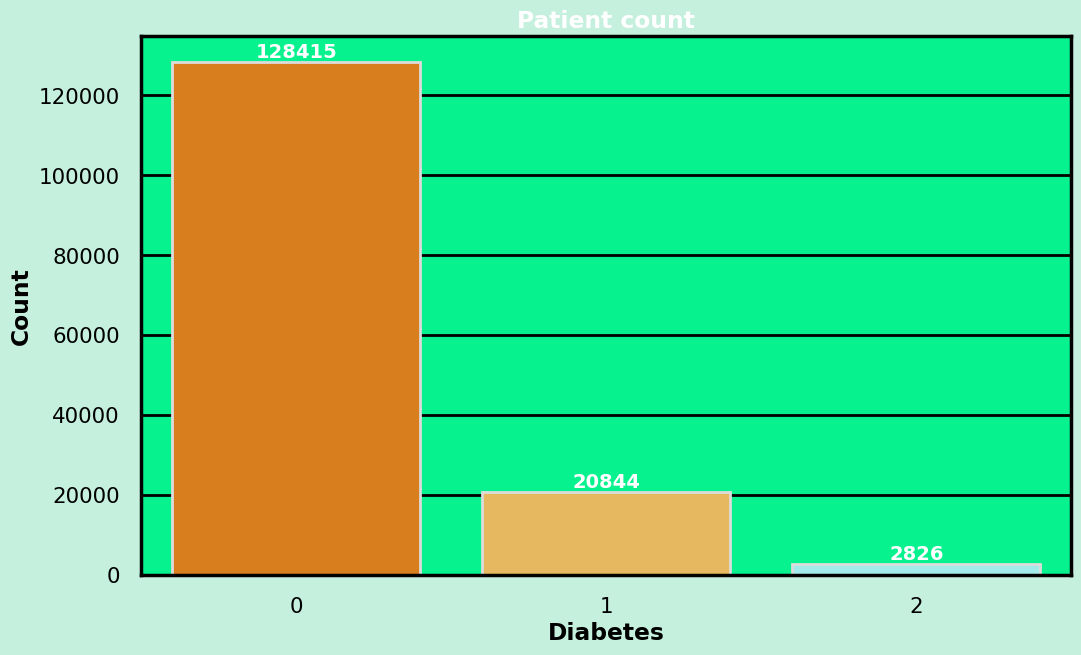

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(12, 7))

data_survived = pd_df['Diabetes_012'].value_counts()
data_survived.index

bar_ax=sns.barplot(x=[0,1,2], y=data_survived, palette=random.sample(palette, 3), edgecolor="#dcdcdc", fill=True)

for i in bar_ax.containers:
    bar_ax.bar_label(i, rotation=0, fontsize = 14, fontweight="bold", color="white")

axs.set_title("Patient count", fontweight="bold", color="white")
axs.set_xlabel("Diabetes", fontweight="bold")
axs.set_ylabel("Count", fontweight="bold")



plt.show()

<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#023e8a;padding:20px;border-radius:10px;border:3px solid #000066;color:white">
    👀 &nbsp;<b>Insight</b><br />

   - <i> The classes were unevenly distributed with heavily weighted to type 0</i><br />
</div>

In [ ]:
df_outlier = pd_df.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.9]).transpose()

df_outlier['skew']=pd_df.skew(numeric_only=True)
df_outlier['unique'] = pd_df.nunique()

df_outlier.style.set_table_styles(table_styles).set_properties(**set_properties)\
.set_caption("Some basic statistical values of the dataset.")

,count,mean,std,min,1%,25%,50%,75%,90%,max,skew,unique
Diabetes_012,152085.000000,0.292692,0.693640,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000056,3
HighBP,152085.000000,0.426623,0.494588,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.296722,2
HighChol,152085.000000,0.424388,0.494251,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.305971,2
CholCheck,152085.000000,0.962764,0.189340,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-4.888257,2
BMI,152085.000000,28.416622,6.864762,12.000000,18.000000,24.000000,27.000000,31.000000,36.000000,98.000000,2.453782,81
Smoker,152084.000000,0.448094,0.497300,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.208752,2
Stroke,152084.000000,0.040379,0.196847,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.669888,2
HeartDiseaseorAttack,152084.000000,0.092745,0.290075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.807963,2
PhysActivity,152084.000000,0.759245,0.427543,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.212735,2
Fruits,152084.000000,0.639771,0.480068,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-0.582306,2


In [ ]:
pd_df_uniq=pd.DataFrame()
for item in pd_df.columns:
  print(item,':', pd_df[item].unique())

Diabetes_012 : [0. 2. 1.]
HighBP : [1. 0.]
HighChol : [1. 0.]
CholCheck : [1. 0.]
BMI : [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83.]
Smoker : [ 1.  0. nan]
Stroke : [ 0.  1. nan]
HeartDiseaseorAttack : [ 0.  1. nan]
PhysActivity : [ 0.  1. nan]
Fruits : [ 0.  1. nan]
Veggies : [ 1.  0. nan]
HvyAlcoholConsump : [ 0.  1. nan]
AnyHealthcare : [ 1.  0. nan]
NoDocbcCost : [ 0.  1. nan]
GenHlth : [ 5.  3.  2.  4.  1. nan]
MentHlth : [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23. nan]
PhysHlth : [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11. nan]
DiffWalk : 

 <div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#023e8a;padding:20px;border-radius:10px;border:3px solid #000066;color:white">
    👀 &nbsp;<b>Inference</b><br />

   

   - <i>The data is not highly skewed and there are very few null values</i><br/>
   - <i>The data looks clean with less outliers, we can handle the outliers in next section</i><br/>

</div>

In [ ]:
def high_corr(val):
    val = val.tolist()
    return ['background-color:green;color:white' if abs(i) > 0.2 else 'background-color:#c600de;color:white' if (abs(i) > 0.1 and abs(i) <= 0.2) else 'background-color:#023e8a;color:white' for i in val]


df_corr=pd.DataFrame(pd_df.corr()['Diabetes_012'].sort_values(ascending=False))
high_corr_columns = df_corr[(df_corr>0.1) | (df_corr<-0.1)].notnull().sum()

df_corr.T.style.set_table_styles(table_styles).set_properties(**set_properties).apply(high_corr)\
.set_caption(f'number of columns with high Correaltion is: {high_corr_columns[0]}')

,Diabetes_012,GenHlth,HighBP,DiffWalk,BMI,HighChol,Age,HeartDiseaseorAttack,PhysHlth,Stroke,MentHlth,CholCheck,Smoker,NoDocbcCost,Sex,AnyHealthcare,Fruits,HvyAlcoholConsump,Veggies,PhysActivity,Education,Income
Diabetes_012,1.000000,0.299526,0.270730,0.222761,0.214325,0.208380,0.182647,0.181715,0.174326,0.105827,0.074347,0.067514,0.061904,0.034983,0.029576,0.012473,-0.042134,-0.057507,-0.058995,-0.121769,-0.127307,-0.170773


<Axes: >

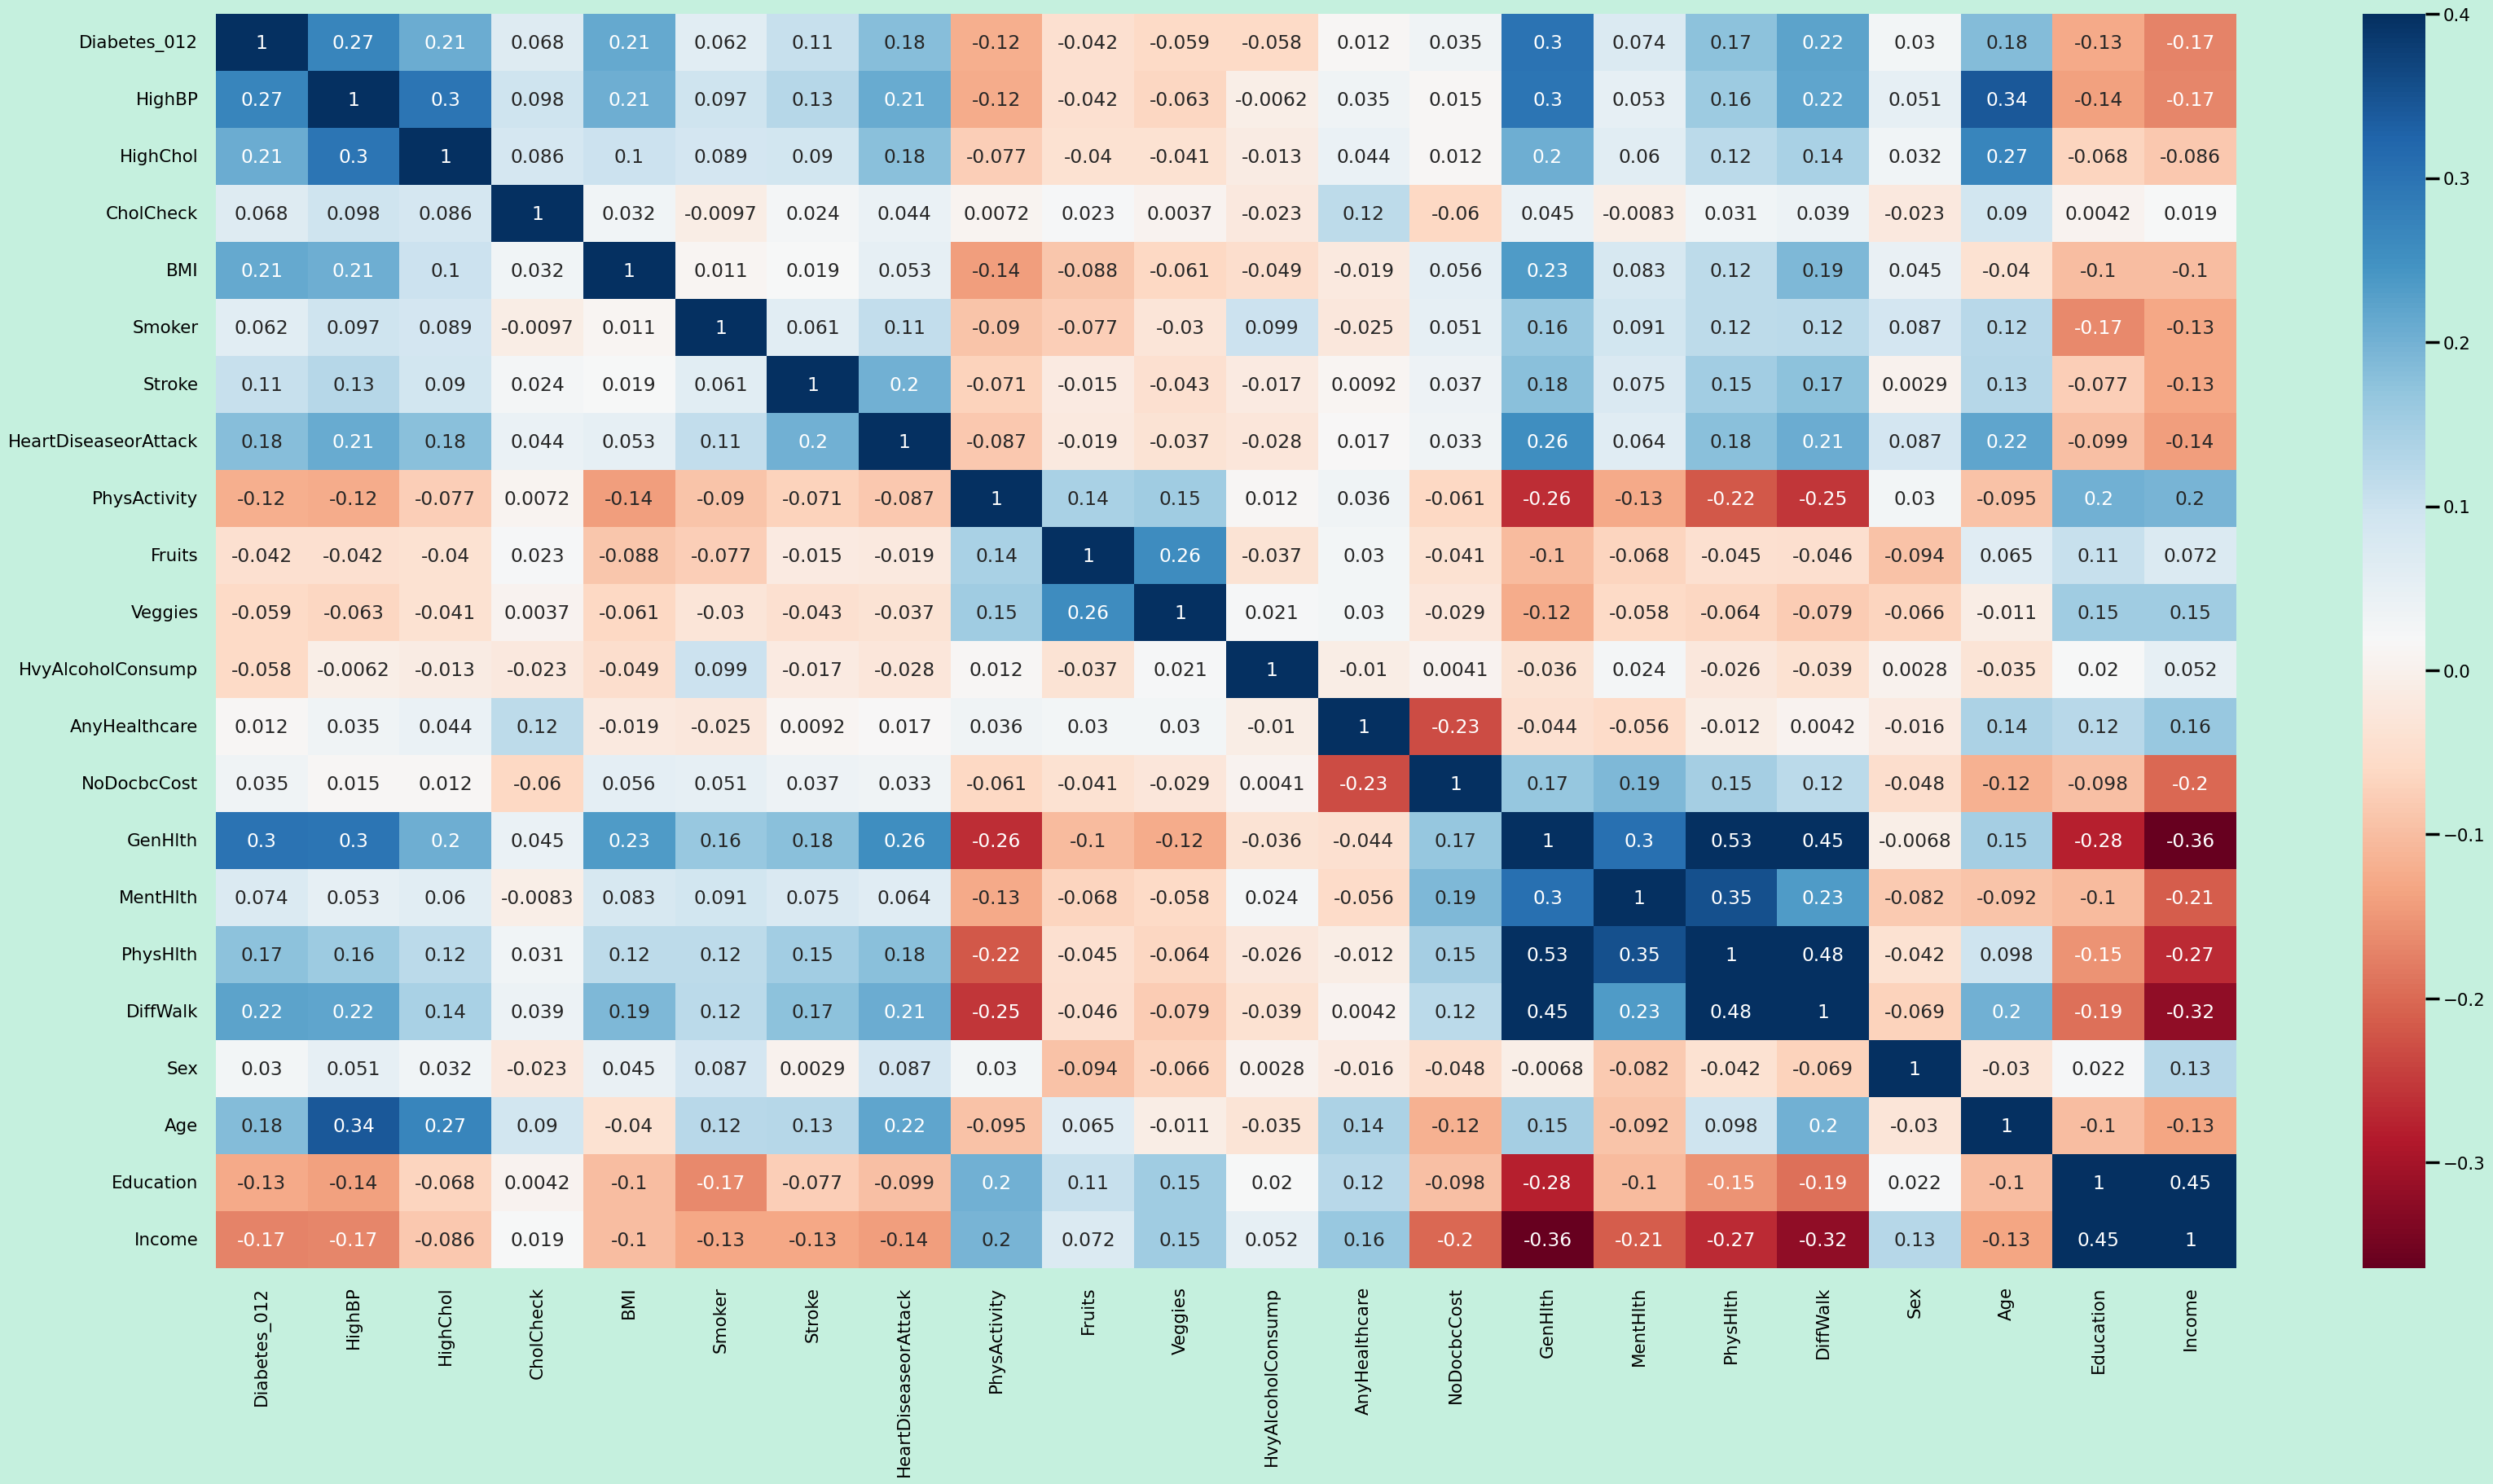

In [ ]:
x_value = pd_df.columns
plt.figure(figsize=(40,20))
sns.heatmap(pd_df[x_value].corr(), annot=True,cmap='RdBu', vmax=0.4)

# <span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px" id="EDA">3. Data Pre-processing and cleaning<a href='#Top' style="text-decoration: none;">^</a></span>

<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#023e8a;padding:20px;border-radius:10px;border:3px solid #000066;color:white">&nbsp;- <i> We will remove the null values as the null is very less percentage</i><br />
    - remove that one null value
</div>

In [ ]:
pd_df_null = pd_df.dropna()

In [ ]:
missing_values = pd_df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(pd_df))*100
pd.DataFrame(pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])).style.set_table_styles(table_styles).set_properties(**set_properties)

,Missing values,% Missing
HvyAlcoholConsump,1,0.000658
AnyHealthcare,1,0.000658
Education,1,0.000658
Age,1,0.000658
Sex,1,0.000658
DiffWalk,1,0.000658
PhysHlth,1,0.000658
MentHlth,1,0.000658
GenHlth,1,0.000658
NoDocbcCost,1,0.000658


In [ ]:
pd_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
pd_df.memory_usage(deep=True)

Index                       128
Diabetes_012            1216680
HighBP                  1216680
HighChol                1216680
CholCheck               1216680
BMI                     1216680
Smoker                  1216680
Stroke                  1216680
HeartDiseaseorAttack    1216680
PhysActivity            1216680
Fruits                  1216680
Veggies                 1216680
HvyAlcoholConsump       1216680
AnyHealthcare           1216680
NoDocbcCost             1216680
GenHlth                 1216680
MentHlth                1216680
PhysHlth                1216680
DiffWalk                1216680
Sex                     1216680
Age                     1216680
Education               1216680
Income                  1216680
dtype: int64

In [ ]:
pd_df_null["Diabetes_012"] = pd_df_null["Diabetes_012"].astype("int8")
pd_df_null["HighBP"] = pd_df_null["HighBP"].astype("int8")
pd_df_null["HighChol"] = pd_df_null["HighChol"].astype("int8")
pd_df_null["CholCheck"] = pd_df_null["CholCheck"].astype("int8")
pd_df_null["BMI"] = pd_df_null["BMI"].astype("int8")
pd_df_null["Smoker"] = pd_df_null["Smoker"].astype("int8")
pd_df_null["Stroke"] = pd_df_null["Stroke"].astype("int8")
pd_df_null["HeartDiseaseorAttack"] = pd_df_null["HeartDiseaseorAttack"].astype("int8")
pd_df_null["PhysActivity"] = pd_df_null["PhysActivity"].astype("int8")
pd_df_null["Fruits"] = pd_df_null["Fruits"].astype("int8")
pd_df_null["Veggies"] = pd_df_null["Veggies"].astype("int8")
pd_df_null["MentHlth"] = pd_df_null["MentHlth"].astype("int8")
pd_df_null["PhysHlth"] = pd_df_null["PhysHlth"].astype("int8")
pd_df_null["DiffWalk"] = pd_df_null["DiffWalk"].astype("int8")
pd_df_null["Sex"] = pd_df_null["Sex"].astype("int8")
pd_df_null["Age"] = pd_df_null["Age"].astype("int8")
pd_df_null["Education"] = pd_df_null["Education"].astype("int8")
pd_df_null["Income"] = pd_df_null["Income"].astype("int8")

In [ ]:
pd_df_null.memory_usage(deep=True)

Index                   1216672
Diabetes_012             152084
HighBP                   152084
HighChol                 152084
CholCheck                152084
BMI                      152084
Smoker                   152084
Stroke                   152084
HeartDiseaseorAttack     152084
PhysActivity             152084
Fruits                   152084
Veggies                  152084
HvyAlcoholConsump       1216672
AnyHealthcare           1216672
NoDocbcCost             1216672
GenHlth                 1216672
MentHlth                 152084
PhysHlth                 152084
DiffWalk                 152084
Sex                      152084
Age                      152084
Education                152084
Income                   152084
dtype: int64

CPU times: user 225 ms, sys: 2.72 ms, total: 227 ms
Wall time: 238 ms


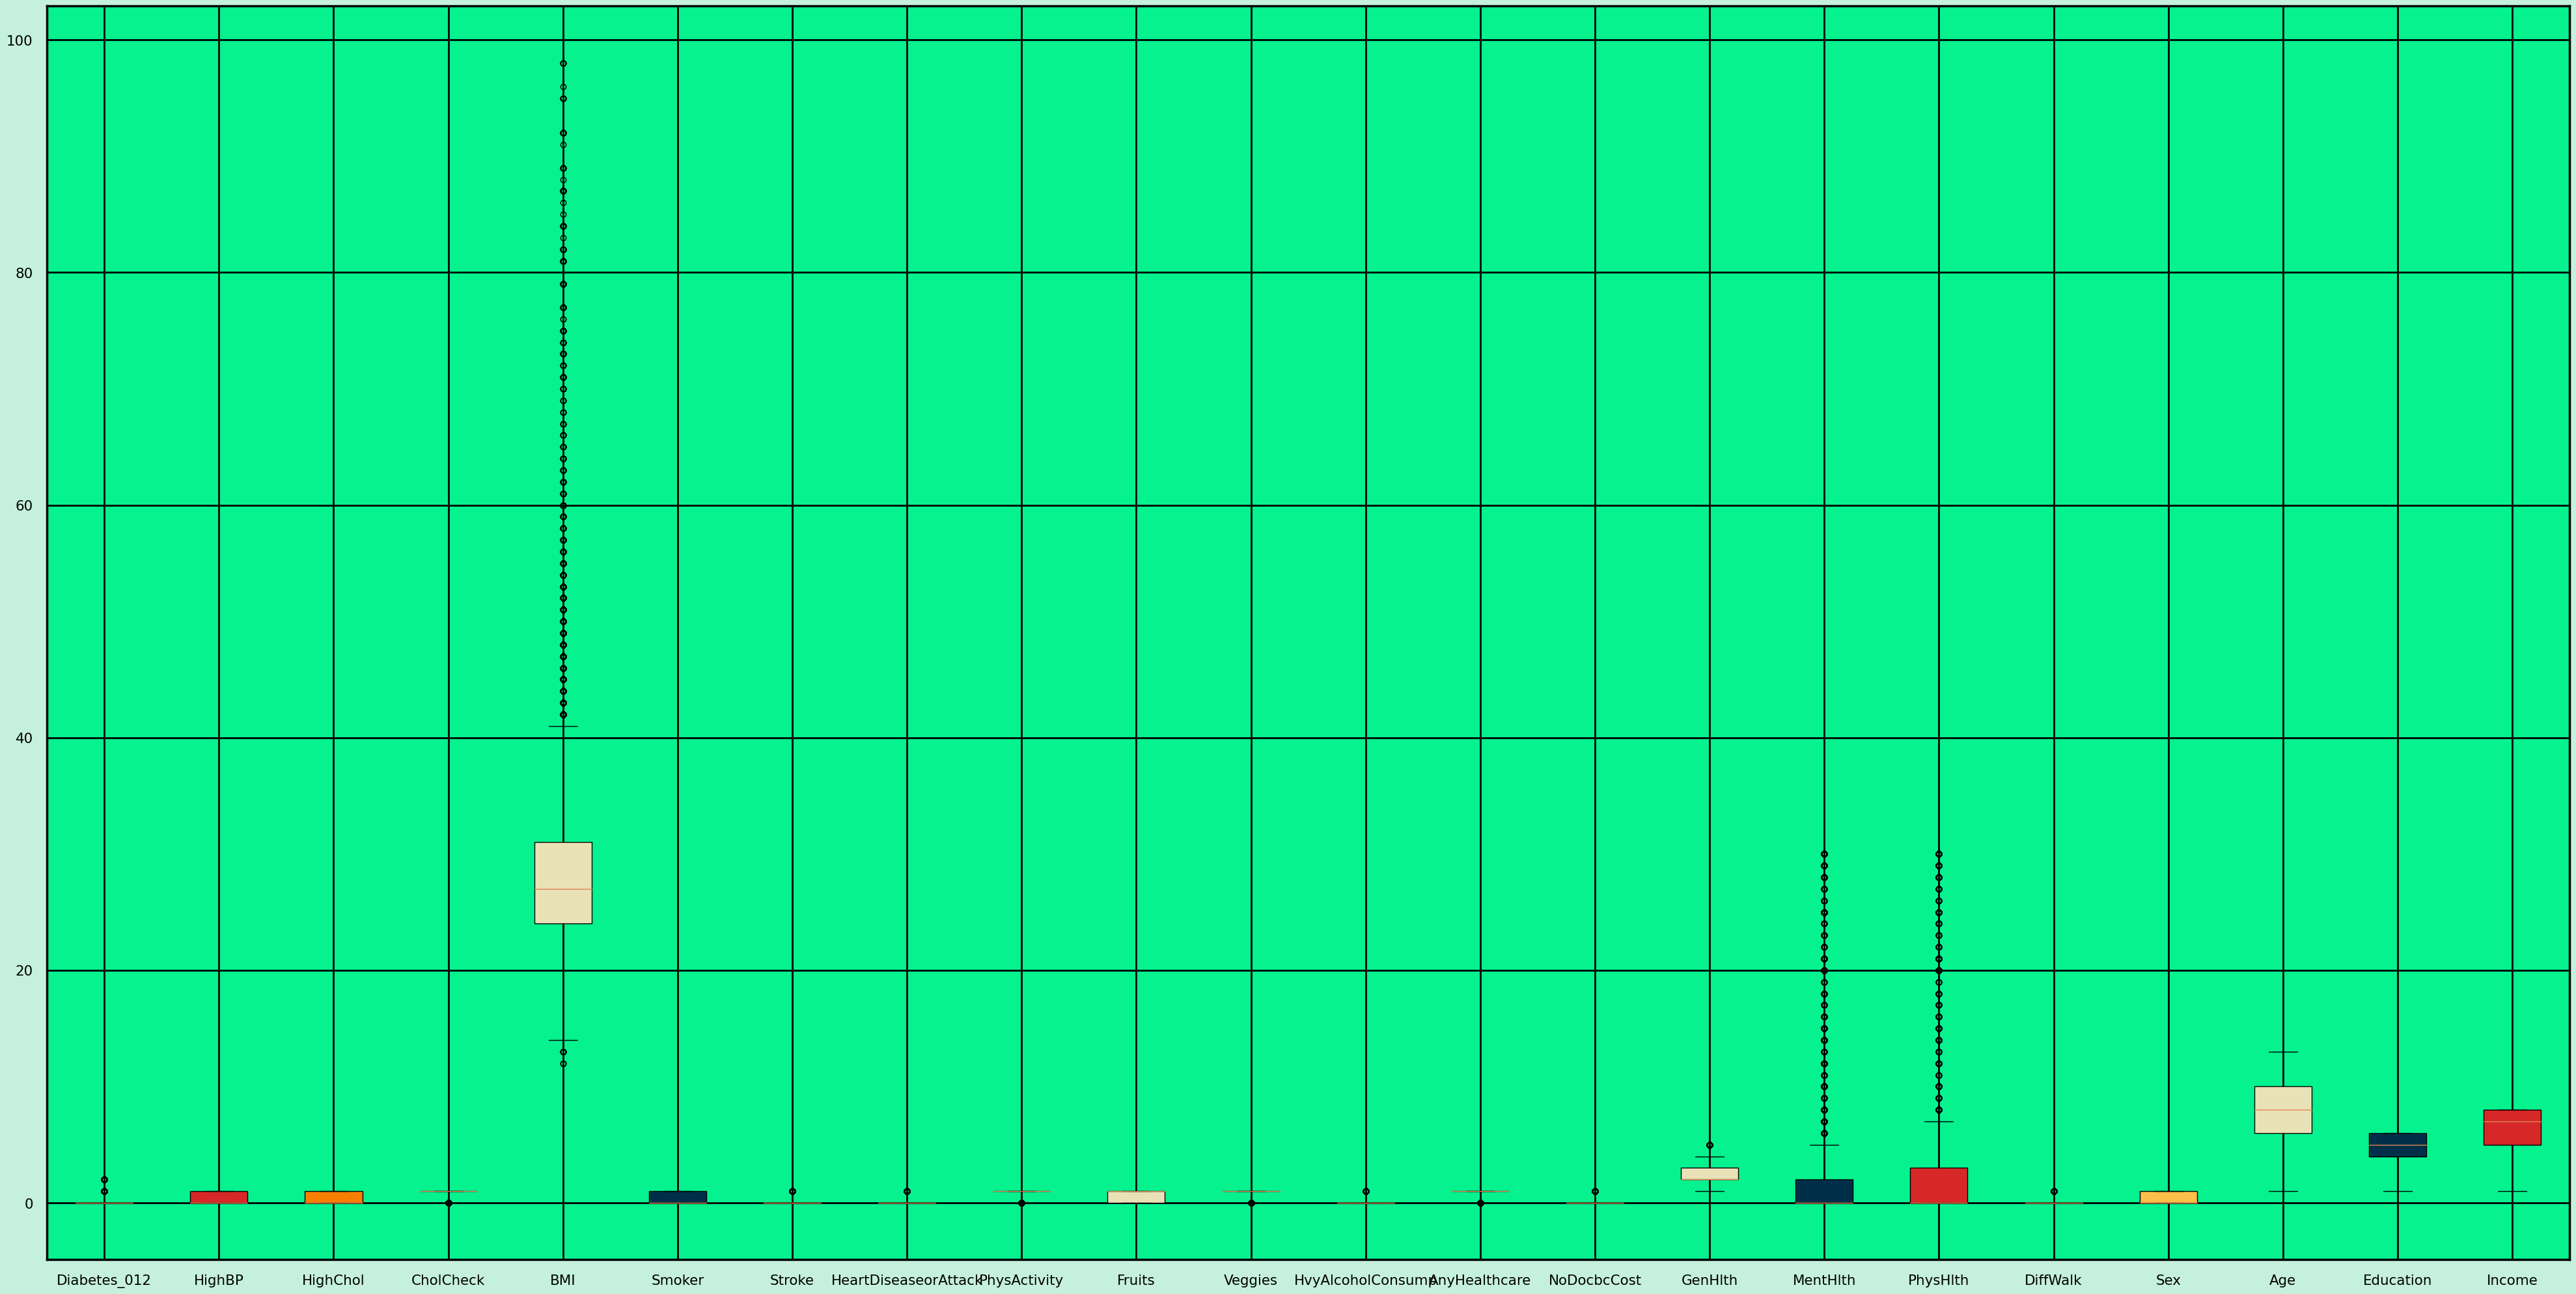

In [ ]:
%%time
#df_plot = df[['length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt', 'shell_wt']]
x_values = pd_df.columns#['length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt', 'shell_wt']

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(50, 25))

#fig = plt.figure(figsize=(40,40))
bplot=ax1.boxplot(pd_df_null,patch_artist=True, labels=x_values)

colors = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7"]*9

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

 <div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#023e8a;padding:20px;border-radius:10px;border:3px solid #000066;color:white">
    👀 &nbsp;<b>Inference</b><br />


   - <i>Univariate and bivariate analysis</i><br/>
   - <i>we are able to see the outliers in the plots</i><br/>
</div>

<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#023e8a;padding:20px;border-radius:10px;border:3px solid #000066;color:white">&nbsp;
<h2>Outlier handling<h2>
</div>

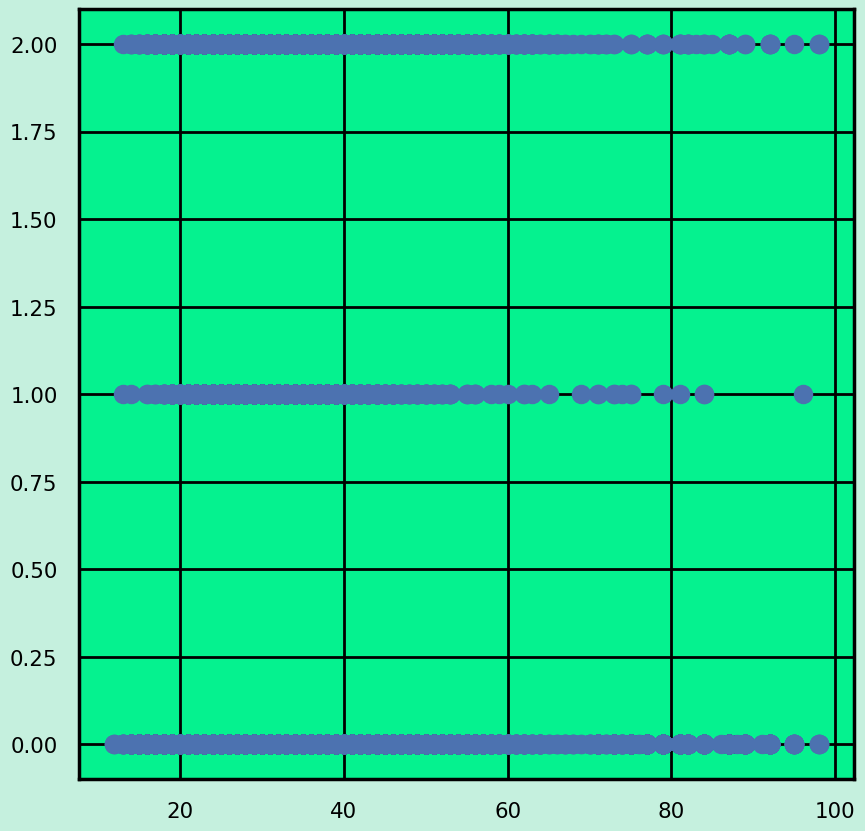

In [ ]:
var = 'BMI'
plt.figure(figsize=(10,10))
plt.scatter(x = pd_df_null[var], y = pd_df_null['Diabetes_012'],)
plt.grid(True)

In [ ]:
pd_df_null.drop(pd_df_null[(pd_df_null['BMI'] > 42)].index, inplace=True)

In [ ]:
pd_df_null.drop(pd_df_null[(pd_df_null['MentHlth'] > 10)].index, inplace=True)
pd_df_null.drop(pd_df_null[(pd_df_null['PhysHlth'] > 10)].index, inplace=True)

 <div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em; background-color:#023e8a;padding:20px;border-radius:10px;border:3px solid #000066;color:white">
    👀 &nbsp;<b>scaling the data</b><br />


   - <i>we will normalise the data</i><br/>
   - <i>the data will be normalised as the values are all above 0</i><br/>
   - <i>standardisation will be used if the values have both positive and negative values</i><br/>
</div>

# <span style="color:white;font-weight:bolder;background-color:#000066;padding:7px;border-radius:7px" id="EDA">4. ModelBuilding and Performance Evaluation<a href='#Top' style="text-decoration: none;">^</a></span>

In [ ]:
from sklearn import preprocessing

pd_df_norm = preprocessing.normalize(pd_df_null.drop(['Diabetes_012','MentHlth',	'CholCheck',	'Smoker',	'NoDocbcCost',	'Sex',	'AnyHealthcare',	'Fruits',	'HvyAlcoholConsump',	'Veggies',\
                'Age',	'HeartDiseaseorAttack',	'PhysHlth',	'Stroke'], axis=1))

In [ ]:
X = pd_df_norm
y = pd_df_null['Diabetes_012']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


   - <i>the data is seperated with 70 train and 30 testing</i><br/>
   - <i>the class is very unevenly distributed and the model may be affected by this skewness </i><br/>


Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     31566
           1       0.02      0.00      0.01       572
           2       0.35      0.14      0.20      4117

    accuracy                           0.86     36255
   macro avg       0.42      0.37      0.38     36255
weighted avg       0.81      0.86      0.83     36255



In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[30482    74  1010]
 [  514     2    56]
 [ 3511    33   573]]


SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
%%time
model_2 = SVC()

CPU times: user 45 µs, sys: 3 µs, total: 48 µs
Wall time: 51.7 µs


In [ ]:
%%time
model_2.fit(X_train,y_train)

CPU times: user 1min 33s, sys: 331 ms, total: 1min 33s
Wall time: 1min 33s


SVC()

In [ ]:
predictions_y = model_2.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions_y))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     31566
           1       0.00      0.00      0.00       572
           2       0.00      0.00      0.00      4117

    accuracy                           0.87     36255
   macro avg       0.29      0.33      0.31     36255
weighted avg       0.76      0.87      0.81     36255



In [ ]:
print(confusion_matrix(y_test,predictions_y))

[[31566     0     0]
 [  572     0     0]
 [ 4117     0     0]]


   - <i>random forest model has better score across classes.</i><br/>
   - <i>the weighted average is also better in random forest when compared to the SVM </i><br/>

In [ ]:
print('random forest\n')
print(classification_report(y_test,rfc_pred))

random forest

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     31566
           1       0.02      0.00      0.01       572
           2       0.35      0.14      0.20      4117

    accuracy                           0.86     36255
   macro avg       0.42      0.37      0.38     36255
weighted avg       0.81      0.86      0.83     36255



In [ ]:
print('support vector machine\n')
print(classification_report(y_test,predictions_y))

support vector machine

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     31566
           1       0.00      0.00      0.00       572
           2       0.00      0.00      0.00      4117

    accuracy                           0.87     36255
   macro avg       0.29      0.33      0.31     36255
weighted avg       0.76      0.87      0.81     36255

